In [1]:
import pandas as pd
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import scipy.signal as signal
import pickle
import os

In [2]:
def cohere(x,y,fs):
    x = x - np.mean(x)
    y = y - np.mean(y) 
    f, Cxy = signal.coherence(x, y, fs, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', axis=-1)
    return(f, Cxy)

In [12]:
# filepath= './dataFolder/TrackingData_2022_11_10/thresholded_bodyparts/'
# trackPoints_files = glob.glob(filepath + '*bodyparts.csv')

# filepath_another = './dataFolder/TrackingData_2022_11_10/ErrorAngle/'
# pilifer_signal_files = glob.glob(filepath_another + '*MV*errorAngle.csv')

In [20]:
# use following for MV data
filepath= './dataFolder/TrackingData_2022_11_10/thresholded_bodyparts/MV_fixed/'
trackPoints_files = glob.glob(filepath + '*bodyparts.csv')

filepath_another = './dataFolder/TrackingData_2022_11_10/ErrorAngle/MV_fixed/'
pilifer_signal_files = glob.glob(filepath_another + '*MV*errorAngle.csv')

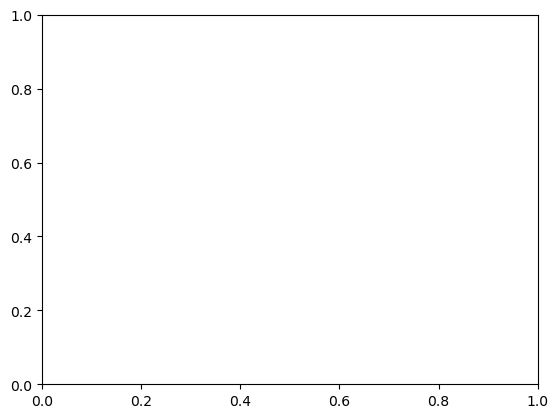

In [21]:
fig_directory_name = './dataFolder/TrackingData_2022_11_10/ErrorAngle/Plots/MSCohere/'
output_directory = './dataFolder/TrackingData_2022_11_10/ErrorAngle/MSCoherence/'
fig = plt.figure()
filming_freq = 100
# dt = 1/freq

for f in pilifer_signal_files:
    pilifer_signal = pd.read_csv(f, index_col=0)
    mothID = f.split('\\')[-1][:-15]
    
    trackPoints = pd.read_csv([file for file in trackPoints_files if mothID in file][0], index_col=0)
    
    pilifer_signal_smooth = signal.savgol_filter(pilifer_signal.values.flatten(), 5, 3)
    pilifer_signal_smooth_deg = pilifer_signal_smooth*(180/np.pi)
    
    body_lateral = trackPoints.loc[:,'body_x']
    nectary_lateral = trackPoints.loc[:,'nectary_x']
    
    freq,nectary_pilifer_Cxy = cohere(nectary_lateral, pilifer_signal_smooth_deg, fs = filming_freq)
    freq_1,pilifer_body_Cxy = cohere(pilifer_signal_smooth_deg, body_lateral, fs = filming_freq)
    freq_2, nectary_body_Cxy = cohere(nectary_lateral, body_lateral, fs = filming_freq)
    

    # Store in a dictionary (recommended for easier retrieval)
    data_dict = {
        'frequency': freq,
        'nectary_pilifer': nectary_pilifer_Cxy,
        'pilifer_body': pilifer_body_Cxy,
        'nectary_body': nectary_body_Cxy
    }

    # Define the filename for the pickle file
    filename = 'Coherence_' + mothID + '.pkl'
    full_path = os.path.join(output_directory, filename)

    # Dump the data to the pickle file
    # Using the dictionary for demonstration
    with open(full_path, 'wb') as pickle_f:
        pickle.dump(data_dict, pickle_f)
    
    
    plt.plot(freq, nectary_pilifer_Cxy, label = 'nectary_pilifer')
    plt.plot(freq, pilifer_body_Cxy, label = 'pilifer_body')
    plt.plot(freq, nectary_body_Cxy, label = 'nectary_body')
    plt.legend()
    
    plt.savefig(fig_directory_name + mothID + '_MSCohere.png')
    plt.cla()

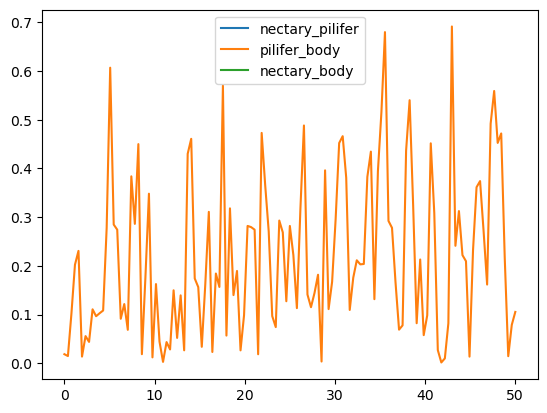

In [14]:
plt.plot(freq, nectary_pilifer_Cxy, label = 'nectary_pilifer')
plt.plot(freq, pilifer_body_Cxy, label = 'pilifer_body')
plt.plot(freq, nectary_body_Cxy, label = 'nectary_body')
plt.legend()